In [1]:
import string
from collections import Counter
import numpy as np

#import pygal
import matplotlib.pyplot as plt
import nltk
#nltk.download('vader_lexicon')

import pandas as pd

In [2]:
df = pd.read_csv("race.csv")
df1=df[['selftext','num_comments','score','title']]
df1=df1.dropna(subset=['selftext'])

#drop meaningless text
df1=df1[(df1.selftext!='[removed]') & (df1.selftext!='[deleted]')]
#df1=df1[(df1.selftext!=' [ ') & (df1.selftext!=' ')]

#drop duplicate
df1=df1.drop_duplicates(subset=['selftext']).reset_index()
df1

,index,selftext,num_comments,score,title
0,0,hey decided put together number showcase label...,13,32,Label Showcase #1: Aus Music
1,1,explore diversity electronic music r electroni...,1,1,/r/electronicmusic needs your help creating a ...
2,2,start tech house eas house melt deep house pic...,0,1,Jamie Jones and The Martinez Bros - Live at Ka...
3,3,make music sound le like geometry dash easy li...,1,1,Masol - Holding [New house producer] I’m seeki...
4,4,kept all fall ra beat segment greg wilson resp...,8,21,Facebook has been pretty good today... Nina vs...
5,5,ok desperately looking song friend suggested s...,2,1,"Looking for a track,need help"
6,6,looking name house track sample rudy francisco...,0,1,Searching
7,7,track like ultra nate free mood ii swing every...,1,1,I'm searching house music and really need you ...
8,8,feeling peggy gou starry night kettama eastsid...,61,42,Best house track of 2019?
9,9,someone could please stick link would really h...,4,3,"Hello, i posted up a load of tunes the other d..."


In [3]:
df_word=pd.read_csv('EMOTION.csv')
df_word=df_word[df_word['emotion-intensity-score']>0.6]
df_word

,word,emotion,emotion-intensity-score
0,outraged,anger,0.964
1,brutality,anger,0.959
2,hatred,anger,0.953
3,hateful,anger,0.940
4,terrorize,anger,0.939
...,...,...,...
8758,inspired,trust,0.602
8759,brighten,trust,0.602
8760,sympathetic,trust,0.602
8761,fulfill,trust,0.602


In [4]:
set(df_word.emotion)

{'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust'}

## Find specific emotional words

In [5]:
df_word[df_word.word == 'risk']

,word,emotion,emotion-intensity-score


In [6]:
df_word[df_word.word == 'account']

,word,emotion,emotion-intensity-score


In [7]:
df_word[df_word.word == 'time']

,word,emotion,emotion-intensity-score


In [8]:
df_word= df_word[df_word.word != 'fire']
df_word= df_word[df_word.word != 'account']

## General Barplot

In [9]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

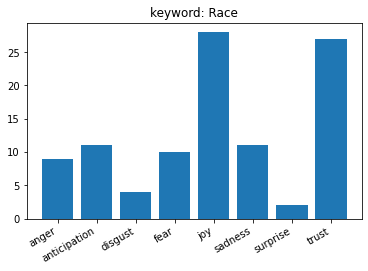

In [10]:
col = [x for x in df1['selftext']]
text = str(col)

lower_case = text.lower()
# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
tokenized_words = cleaned_text.split()
final_words = []
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)
        

emotion_list = []
word=list(df_word.word)
emotion=list(df_word.emotion)

for i in range(len(df_word)):
    if word[i] in final_words:
        emotion_list.append(emotion[i])
            
w = Counter(emotion_list)
            
            
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.title('keyword: Race')
plt.show()

In [11]:
def emo(tokens,emo):
    zip_iterator = zip(df_word.word, df_word.emotion)
    D= dict(zip_iterator)
    newDict = dict(filter(lambda x: x[1]== emo, D.items()))
    emotion_words=list(newDict.keys())
    List=list(itertools.chain(*tokens))
    
    result = []
    for word in List:
        if word in emotion_words:
            result.append(word)
    return result

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud(words):

    # Create a list of word
    text=' '.join(words)

    # Create the wordcloud object
    wordcloud = WordCloud(width=1500, height=1000, margin=0,background_color='white').generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

In [13]:
import nltk
lower_case = df1['selftext'].str.lower()
cleaned_text = lower_case.str.translate(str.maketrans('', '', string.punctuation))
tokens=cleaned_text.apply(lambda x: nltk.word_tokenize(x))
print(tokens)

0     [hey, decided, put, together, number, showcase...
1     [explore, diversity, electronic, music, r, ele...
2     [start, tech, house, eas, house, melt, deep, h...
3     [make, music, sound, le, like, geometry, dash,...
4     [kept, all, fall, ra, beat, segment, greg, wil...
5     [ok, desperately, looking, song, friend, sugge...
6     [looking, name, house, track, sample, rudy, fr...
7     [track, like, ultra, nate, free, mood, ii, swi...
8     [feeling, peggy, gou, starry, night, kettama, ...
9     [someone, could, please, stick, link, would, r...
10    [sure, type, post, allowed, here, tried, r, if...
11    [hi, guy, researching, race, sexuality, gender...
12    [hi, guy, questionnaire, centred, around, race...
13    [hi, guy, thought, might, able, help, looking,...
14    [meaning, while, lot, people, keep, posting, s...
15    [remix, muriel, dacqs, tropique, absolute, ban...
16    [link, amp, xb, omnia, nightclub, vega, long, ...
17    [title, looking, modern, house, track, rac

In [14]:
import itertools

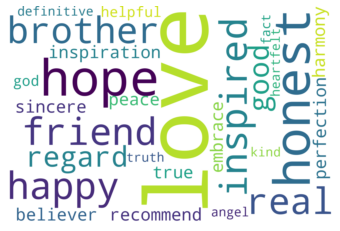

In [15]:

trust=emo(tokens,'trust')
wordcloud(trust)

In [16]:
Counter(trust).most_common(10)

[('love', 28),
 ('hope', 4),
 ('honest', 4),
 ('inspired', 2),
 ('friend', 2),
 ('happy', 2),
 ('brother', 2),
 ('real', 2),
 ('regard', 2),
 ('good', 2)]

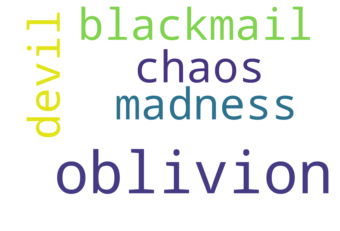

In [17]:
fear=emo(tokens,'fear')
wordcloud(fear)

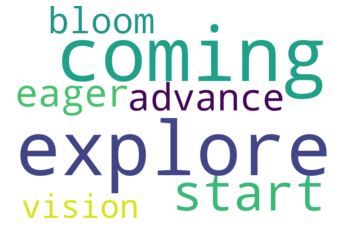

In [18]:
anticipation=emo(tokens,'anticipation')
wordcloud(anticipation)

In [19]:
Counter(anticipation).most_common(10)

[('explore', 2),
 ('coming', 2),
 ('start', 2),
 ('eager', 1),
 ('advance', 1),
 ('bloom', 1),
 ('vision', 1)]

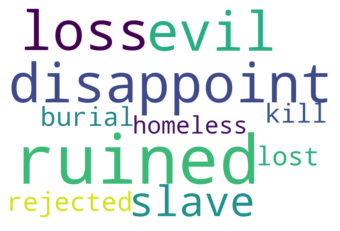

In [20]:
sadness=emo(tokens,'sadness')
wordcloud(sadness)

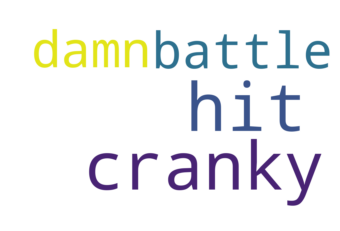

In [21]:
anger=emo(tokens,'anger')
wordcloud(anger)

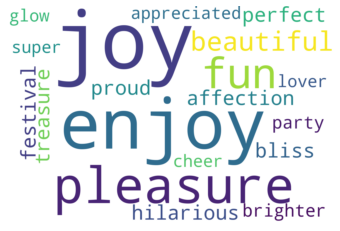

In [22]:
joy=emo(tokens,'joy')
wordcloud(joy)